Exploring xgBoost with the Iris Dataset
========================================

This notebook has 2 purposes: first, provide a space to explore Jupyter notebooks. Second, learn about the xgBoost library through interacting with the petal dataset.

In [56]:
from xgboost import XGBClassifier

import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()

# For ease of use, create a pandas daraframe for the iris data
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

In [57]:
# print column headers, for debugging and understanding the shape of the dataset
print(df_iris.columns.values)

['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)' 'target']


In [59]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# split the data into train and test sections
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_iris[features], 
                                                                    df_iris['target'], 
                                                                    test_size = .2)

# create the classifier model and then fit the model
boost = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
boost.fit(X_train, y_train)

print(X_test.shape)

(30, 3)


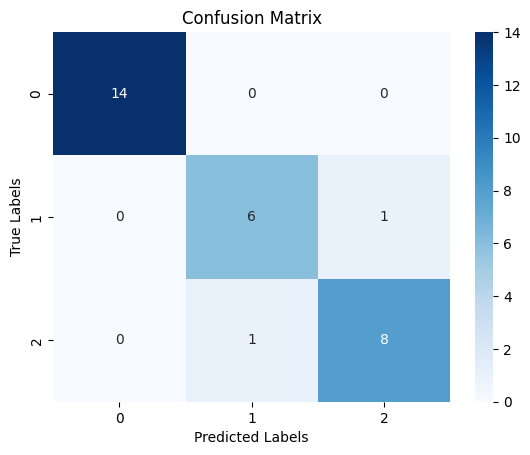

In [60]:
# make predictions on the X_test dataset
y_preds = boost.predict(X_test)

# calculate the confusion matrix to understand the model accuracy
cm = confusion_matrix(y_test, y_preds)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [61]:
importance = boost.feature_importances_

feature_importance = pd.DataFrame({'Feature:': X_train.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print(feature_importance)

            Feature:  Importance
2   petal width (cm)    0.796629
1  petal length (cm)    0.203371
0  sepal length (cm)    0.000000
